
Calcular la divergencia KL para el ancho y largo de las hojas de la clase 1 ajustando a una normal.

Divergencia de Kullback-Leibler para el ancho: 0.10195138575097319
Divergencia de Kullback-Leibler para el largo: 0.04953998361243926


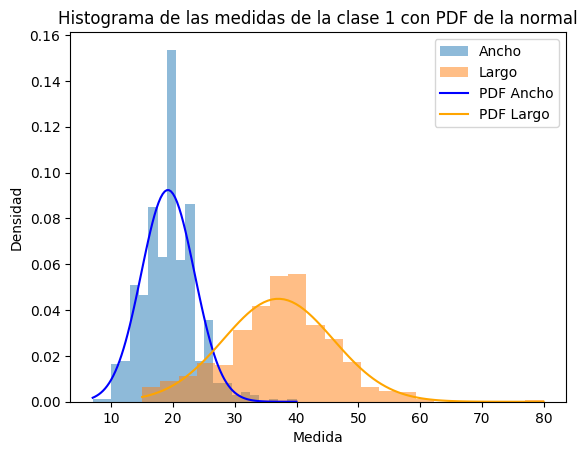

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Cargar los datos
data = pd.read_csv('dataset.csv')
data_clase_1 = data[data['clase'] == 1]

bins = int(np.sqrt(len(data_clase_1)))

# Calcular la media y la desviación estándar
media_ancho = data_clase_1['ancho'].mean()
desviacion_ancho = data_clase_1['ancho'].std()
media_largo = data_clase_1['largo'].mean()
desviacion_largo = data_clase_1['largo'].std()

# Contar cuántas muestras cayeron en cada bin del histograma
conteos_ancho, bordes_ancho = np.histogram(data_clase_1['ancho'], bins=bins)
conteos_largo, bordes_largo = np.histogram(data_clase_1['largo'], bins=bins)

# Calcular la probabilidad de que una muestra caiga en cada bin
probabilidades_ancho = conteos_ancho / len(data_clase_1)
probabilidades_largo = conteos_largo / len(data_clase_1)

# Calculo la acumulada para Q
q_ancho = norm.cdf(bordes_ancho, loc=media_ancho, scale=desviacion_ancho)
q_largo = norm.cdf(bordes_largo, loc=media_largo, scale=desviacion_largo)

ancho_para_q = []
largo_para_q = []

for i in range(0, len(q_ancho)-1):
    prob = q_ancho[i+1] - q_ancho[i]
    ancho_para_q.append(prob)

for i in range(0, len(q_largo)-1):
    prob = q_largo[i+1] - q_largo[i]
    largo_para_q.append(prob)

# Calcular la divergencia
divergencia_ancho = 0
divergencia_largo = 0

for i in range(0, len(probabilidades_ancho)):
    if probabilidades_ancho[i] > 0:  # Omitir bins vacíos
        divergencia_ancho += probabilidades_ancho[i] * np.log(probabilidades_ancho[i] / ancho_para_q[i])

for i in range(0, len(probabilidades_largo)):
    if probabilidades_largo[i] > 0:  # Omitir bins vacíos
        divergencia_largo += probabilidades_largo[i] * np.log(probabilidades_largo[i] / largo_para_q[i])

print('Divergencia de Kullback-Leibler para el ancho:', divergencia_ancho)
print('Divergencia de Kullback-Leibler para el largo:', divergencia_largo)

# Graficar los histogramas
plt.hist(data_clase_1['ancho'], bins=bins, alpha=0.5, label='Ancho', density=True)
plt.hist(data_clase_1['largo'], bins=bins, alpha=0.5, label='Largo', density=True)

# Graficar la PDF de la normal
x_ancho = np.linspace(bordes_ancho[0], bordes_ancho[-1], 100)
x_largo = np.linspace(bordes_largo[0], bordes_largo[-1], 100)
pdf_ancho = norm.pdf(x_ancho, loc=media_ancho, scale=desviacion_ancho)
pdf_largo = norm.pdf(x_largo, loc=media_largo, scale=desviacion_largo)

plt.plot(x_ancho, pdf_ancho, label='PDF Ancho', color='blue')
plt.plot(x_largo, pdf_largo, label='PDF Largo', color='orange')

plt.legend(loc='upper right')
plt.xlabel('Medida')
plt.ylabel('Densidad')
plt.title('Histograma de las medidas de la clase 1 con PDF de la normal')
plt.show()